In [6]:
import os
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [7]:
df_freesolv = 'freesolv'
df_esol = 'esol'
save_dir = r'..\results_figure\scatter'

# MSE for Test dataset

In [8]:
# MSE
df_test_MSE_freesolv = pd.read_csv(r'..\results_datasets\result_test_' + df_freesolv + '_mse' + '.csv')
print(df_test_MSE_freesolv.shape[1])

# MSE
df_test_MSE_esol = pd.read_csv(r'..\results_datasets\result_test_' + df_esol + '_mse' + '.csv')
print(df_test_MSE_esol.shape[1])

52
65


In [9]:
# MSE 컬럼명 추가
columns = ['target', 'pred'] + [f'feature{i}' for i in range(1, df_test_MSE_freesolv.shape[1]-1)]
df_test_MSE_freesolv.columns = columns

# MSE 컬럼명 추가
columns = ['target', 'pred'] + [f'feature{i}' for i in range(1, df_test_MSE_esol.shape[1]-1)]
df_test_MSE_esol.columns = columns

In [10]:
# R^2
r2_freesolv = r2_score(df_test_MSE_freesolv['target'], df_test_MSE_freesolv['pred'])
print('r2_mse:', r2_freesolv)

# R^2
r2_esol = r2_score(df_test_MSE_esol['target'], df_test_MSE_esol['pred'])
print('r2_mse:', r2_esol)

r2_mse: 0.9230842018649109
r2_mse: 0.906968816461611


..\results_figure\scatter\2.pdf


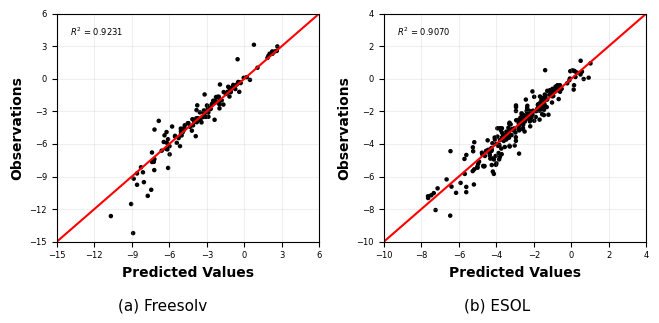

In [ ]:
from matplotlib.colors import ListedColormap

def plot_dataset(df_test_MSE, dataset, r2_mse, ax):
    if dataset in ['freesolv', 'esol']:
        s = 5
    elif dataset in []:
        s = 25

    pastel_cmap = ListedColormap(["black"])

    scatter = ax.scatter(df_test_MSE['pred'], df_test_MSE['target'],
                         c=df_test_MSE['target'], s=s,
                         cmap=pastel_cmap)

    # 대각선 추가
    min_val = min(df_test_MSE['target'].min(), df_test_MSE['pred'].min()) - 20
    max_val = max(df_test_MSE['target'].max(), df_test_MSE['pred'].max()) + 20
    ax.plot([min_val, max_val], [min_val, max_val], color='red')

    if dataset == 'freesolv':
        ax.set_xlim(-15, 6)
        ax.set_ylim(-15, 6)
        ax.set_xticks(range(-15, 9, 3))
        ax.set_yticks(range(-15, 9, 3))
        ax.tick_params(axis='both', labelsize=6)
    elif dataset == 'esol':
        ax.set_xlim(-10, 4)
        ax.set_ylim(-10, 4)
        ax.set_xticks(range(-10, 6, 2))
        ax.set_yticks(range(-10, 6, 2))
        ax.tick_params(axis='both', labelsize=6)

    ax.set_xlabel("Predicted Values", fontweight='bold')
    ax.set_ylabel("Observations", fontweight='bold')

    ax.text(0.05, 0.90, rf'$R^2$ = {r2_mse:.4f}',
            transform=ax.transAxes, fontsize=6)

    ax.grid(alpha=0.2)


# 1행 2열 subplot 생성
fig, axes = plt.subplots(1, 2, figsize=(6.69, 3.0))

# freesolv
plot_dataset(df_test_MSE_freesolv, 'freesolv', r2_freesolv, axes[0])

# esol
plot_dataset(df_test_MSE_esol, 'esol', r2_esol, axes[1])

# (a), (b) 추가
fig.text(0.25, -0.05, "(a) Freesolv", ha="center", fontsize=11)
fig.text(0.75, -0.05, "(b) ESOL", ha="center", fontsize=11)

plt.tight_layout()

# file_name = '2.pdf'
# file_path = os.path.join(save_dir, file_name)
# print(file_path)
# plt.savefig(file_path, dpi=300, bbox_inches = "tight")

plt.show()
